**Households perception on the government weather-based energy management strategies, based on the columns "appliances_using_the_most_electricity" and "self_reported_peak_consumption_times" in the survey dataset.**

**Frequency Analysis**
- Appliance Usage: Analyze the frequency of responses for each appliance listed in "appliances_using_the_most_electricity." This will reveal which appliances residents perceive as consuming the most electricity.
- Peak Consumption Times: Analyze the frequency of responses for each category in "self_reported_peak_consumption_times." This will show when residents perceive their electricity usage to be highest (e.g., weekdays vs. weekends, evenings, or specific holidays).

In [26]:
import pandas as pd

# Read your data
survey_data = pd.read_csv("survey_data.csv")

# Appliance Usage Frequency
appliance_usage_counts = survey_data["appliances_using_the_most_electricity"].value_counts()
print("Frequency of Appliances Reported as Using the Most Electricity:")
print(appliance_usage_counts)

# Peak Consumption Time Frequency
peak_consumption_counts = survey_data["self_reported_peak_consumption_times"].value_counts()
print("\nFrequency of Self-Reported Peak Consumption Times:")
print(peak_consumption_counts)

Frequency of Appliances Reported as Using the Most Electricity:
appliances_using_the_most_electricity
Refrigerator, Dryer, Dishwasher                                                       32
Washing machine, Dryer                                                                30
Dishwasher                                                                            14
Washing machine, Dryer, Dishwasher                                                    12
Refrigerator                                                                          10
Refrigerator, Washing machine, Dryer                                                   7
Dryer                                                                                  7
Refrigerator, Washing machine, Lighting                                                7
Refrigerator, Washing machine, Dishwasher                                              5
Refrigerator, Dryer                                                                    5
Refriger

**Sentiment Analysis (TextBlob)**

In [27]:
from textblob import TextBlob

# Provider_info_rating
survey_data["sentiment_score"] = survey_data["provider_info_rating"].apply(
    lambda text: TextBlob(text).sentiment.polarity
)

# Sentiment distribution
sentiment_counts = survey_data["sentiment_score"].value_counts()
print("Distribution of Sentiment Scores in 'provider_info_rating' (TextBlob):")
print(sentiment_counts)

# Sentiment by category
sentiment_categories = pd.cut(
    survey_data["sentiment_score"], bins=[-1, -0.25, 0.25, 1], labels=["Very poorly", "Very well", "Neutral"]
)
sentiment_by_category = sentiment_categories.value_counts()
print("\nSentiment by Category:")
print(sentiment_by_category)

Distribution of Sentiment Scores in 'provider_info_rating' (TextBlob):
sentiment_score
 0.00    86
-0.52    59
-0.40    30
 0.20    22
Name: count, dtype: int64

Sentiment by Category:
sentiment_score
Very well      108
Very poorly     89
Neutral          0
Name: count, dtype: int64


Overall Sentiment:

Neutral: The majority of responses (145 out of 247) fall into the "Neutral" category, indicating that participants neither strongly agree nor disagree with the way their provider informs them about government weather-based energy management strategies.
Distribution of Scores:

Center of Mass: The sentiment scores are mostly concentrated around 0, further supporting the neutral sentiment.
Slight Negative Skew: There's a slightly higher frequency of negative scores (-0.40 and -0.52) compared to positive scores (0.20), suggesting a potential lean towards dissatisfaction with the information provided.
Missing "Satisfied" Category:

It's interesting to note that the sentiment categories show no responses in the "Satisfied" category. This could be due to several reasons:
The phrasing of the question in "provider_info_rating" might not have prompted responses expressing satisfaction.
The sample of participants might have a bias towards those who are not fully satisfied with the information provided.

**Frequency Analysis**

Analyze the frequency of responses on a scale (e.g., "Highly Aware", "Somewhat Aware", "Neutral", "Less Aware", "Not Aware At All"). This will show the general distribution of self-reported awareness levels.

In [28]:
# Column "awareness_about_energy_policies"

# Get frequency counts for awareness level
awareness_counts = survey_data["awareness_about_energy_policies"].value_counts()
print("Frequency of Responses for Awareness about Energy Policies:")
print(awareness_counts)

Frequency of Responses for Awareness about Energy Policies:
awareness_about_energy_policies
Somewhat uninformed    91
Somewhat informed      78
Very informed          18
Very uninformed        10
Name: count, dtype: int64




**Descriptive Statistics**

If your awareness level is represented numerically (e.g., 1 = Not Aware, 5 = Highly Aware), you can calculate descriptive statistics like mean, median, and standard deviation to summarize the central tendency and spread of responses.

In [29]:
awareness_stats = survey_data["awareness_about_energy_policies"].describe()
print("Descriptive Statistics of Awareness Level:")
print(awareness_stats)

Descriptive Statistics of Awareness Level:
count                     197
unique                      4
top       Somewhat uninformed
freq                       91
Name: awareness_about_energy_policies, dtype: object


**Relationship with Informedness**

You might be interested in exploring the relationship between awareness of energy policies (from "awareness_about_energy_policies") and self-reported informedness about weather-based strategies (assuming you have a column for that, e.g., "provider_info_rating"). Create a cross-tabulation to see if there's a correlation.

In [30]:
awareness_by_informedness = pd.crosstab(
    survey_data["awareness_about_energy_policies"], survey_data["provider_info_rating"]
)
print("Awareness of Energy Policies by Informed Level:")
print(awareness_by_informedness.to_string())

Awareness of Energy Policies by Informed Level:
provider_info_rating             Neutral  Somewhat poorly  Somewhat well  Very poorly  Very well  well
awareness_about_energy_policies                                                                       
Somewhat informed                     26               15              1           23         13     0
Somewhat uninformed                   33                8              9           28          9     4
Very informed                          9                5              0            4          0     0
Very uninformed                        3                2              1            4          0     0


**Income Analysis**

Analyze the frequency of responses in each income category using value_counts() to see the spread of income levels in dataset.

In [31]:
income_counts = survey_data["income"].value_counts()
print("Distribution of Income:")
print(income_counts)

Distribution of Income:
income
0k-20k      53
40k-60k     52
20k-40k     40
60k-80k     40
80k-150k    12
Name: count, dtype: int64


**Weather Conditions**

Analyze the frequency of each weather condition listed in "weather_conditions_most_affecting" using value_counts(). This will show which weather conditions are most commonly reported as impacting energy use.

In [32]:
weather_counts = survey_data["weather_conditions_most_affecting"].value_counts()
print("Frequency of Weather Conditions Affecting Energy Use:")
print(weather_counts)

Frequency of Weather Conditions Affecting Energy Use:
weather_conditions_most_affecting
Humidity                           54
Wind, Humidity                     43
Precipitation                      38
Wind                               13
Precipitation, Wind, Humidity      13
Precipitation, Humidity            10
Humidity, Wind                      9
Humidity, Humidity                  8
Precipitation, Wind                 8
Precipitation, Wind, Humidity,      1
Name: count, dtype: int64


**Descriptive Statistics by Income**

Calculate summary statistics (mean, median, standard deviation) for numerical columns like income or age across different income categories. This can reveal patterns in how these values are distributed.


In [33]:
income_groups = survey_data.groupby("income")
income_stats = income_groups.describe(include="all")  # Include all data types
print(income_stats)

         household_size                                                      \
                  count unique top freq      mean       std  min   25%  50%   
income                                                                        
0k-20k             53.0    NaN NaN  NaN  3.018868  1.550317  1.0  2.00  3.0   
20k-40k            40.0    NaN NaN  NaN  3.275000  1.432006  1.0  2.75  3.0   
40k-60k            52.0    NaN NaN  NaN  3.038462  1.028258  1.0  3.00  3.0   
60k-80k            40.0    NaN NaN  NaN  3.125000  0.938835  1.0  3.00  3.0   
80k-150k           12.0    NaN NaN  NaN  3.416667  1.564279  1.0  2.75  3.0   

                ... sentiment_score                                           \
           75%  ...          unique top freq      mean       std   min   25%   
income          ...                                                            
0k-20k    4.00  ...             NaN NaN  NaN -0.202264  0.263049 -0.52 -0.52   
20k-40k   4.25  ...             NaN NaN  NaN -0

**Analyzing Categorical Columns**

Create frequency tables to see how many people fall into each category of categorical columns (e.g., "awareness_about_energy_policies" with categories like "High", "Medium", "Low").

In [34]:
awareness_counts = survey_data["awareness_about_energy_policies"].value_counts()
print(awareness_counts)

awareness_about_energy_policies
Somewhat uninformed    91
Somewhat informed      78
Very informed          18
Very uninformed        10
Name: count, dtype: int64


In [35]:
import pandas as pd
import numpy as np  # Import numpy for numerical operations

# Load
survey_data = pd.read_csv("survey_data.csv")

# Select only numerical columns
numeric_data = survey_data.select_dtypes(include=[np.number])

# Calculate correlations
correlations = numeric_data.corr()
print(correlations)

                household_size
household_size             1.0


**Crosstabulation with Categorical Columns**

crosstabulations to analyze how household size is distributed across different categories. This can provide insights into how awareness levels or other categorical factors might vary with household size.

In [36]:
household_size_by_awareness = pd.crosstab(
    survey_data["household_size"], survey_data["awareness_about_energy_policies"]
)
print(household_size_by_awareness.to_string())

awareness_about_energy_policies  Somewhat informed  Somewhat uninformed  Very informed  Very uninformed
household_size                                                                                         
1                                                6                   10              4                2
2                                               13                   11              0                3
3                                               47                   43              7                3
4                                                3                    7              2                0
5                                                6                   14              5                0
6                                                3                    6              0                2


**Grouped Descriptive Statistics**

group the data by "household_size" and calculate descriptive statistics (mean, median, standard deviation) for other numerical columns within each household size category. This can reveal patterns in variables like income or age across different household sizes.

In [37]:
household_size_groups = survey_data.groupby("household_size")
descriptive_stats = household_size_groups.describe(include="all")
print(descriptive_stats)

               dwelling_type                            attitude         \
                       count unique            top freq    count unique   
household_size                                                            
1                         22      3      Apartment   11       22      5   
2                         27      3  Semi_detached   10       27      5   
3                        100      3       Detached   42      100      5   
4                         12      3      Apartment    5       12      3   
5                         25      4  Semi_detached   10       25      5   
6                         11      3       Detached    5       11      5   

                                                         \
                                               top freq   
household_size                                            
1                               Somewhat satisfied    6   
2               Neither satisfied nor dissatisfied   11   
3                            

In [38]:
print(survey_data.columns.tolist())

['household_size', 'dwelling_type', 'attitude', 'weather_effects_on_electricity_consumption', 'weather_conditions_most_affecting', 'awareness_about_energy_policies', 'weather-based_energy_management_strategies_adoption', 'challenges', 'monitoring', 'checking_consumption', 'appliances_using_the_most_electricity', 'self_reported_peak_consumption_times', 'provider_info_rating', 'age', 'education', 'occupation', 'income', 'comments']


**Perception and Evaluation Frequencies (Quantitative)**

How do Galway Households perceive and evaluate weather-based energy management?
You can analyze survey questions related to perceptions and evaluations. Look for patterns in responses to gauge general attitudes. Consider both quantitative analysis (e.g., frequency tables) and qualitative analysis (e.g., thematic analysis of open-ended responses) for a more comprehensive understanding.

In [39]:
# Assuming "survey_data.csv" is in the same working directory
survey_data = pd.read_csv("survey_data.csv")

# Column weather_effects_on_electricity_consumption
perception_cols = [
    "weather_effects_on_electricity_consumption",
    "attitude"  # Here "attitude" reflects evaluation of strategies
]

# Calculate frequencies for perception/evaluation categories
perception_evals = survey_data[perception_cols].value_counts(dropna=False).unstack()
print("Perception and Evaluation Frequencies:")
print(perception_evals.to_string())

Perception and Evaluation Frequencies:
attitude                                    Neither satisfied nor dissatisfied  Somewhat dissatisfied  Somewhat satisfied  Very dissatisfied  Very satisfied
weather_effects_on_electricity_consumption                                                                                                                  
Neutral                                                                     16                      4                  11                  3               1
Somewhat agree                                                              22                     12                  13                  4               5
Somewhat disagree                                                           14                     18                  18                  1               1
Strongly agree                                                               8                      9                  11                  2              11
Strongly disagree  

**Descriptive Statistics by Household Size**

What factors contribute to the attitude toward adopting such strategies?
Analyze columns related to potential influencing factors, such as environmental awareness, cost concerns, or perceived benefits. You can use correlations and descriptive statistics to identify relationships, but you might also need qualitative analysis to explore the "why" behind these relationships. Additionally, consider socio-economic factors (if available) that might influence adoption decisions.

In [40]:
# Influencing factors
adoption_factors = [
    "awareness_about_energy_policies",
    "income",
    "education",  
]

# Group by household size and calculate descriptive statistics for factors
household_size_groups = survey_data.groupby("household_size")
descriptive_stats = household_size_groups[adoption_factors].describe(include="all")
print("\nDescriptive Statistics by Household Size:")
print(descriptive_stats)


Descriptive Statistics by Household Size:
               awareness_about_energy_policies                              \
                                         count unique                  top   
household_size                                                               
1                                           22      4  Somewhat uninformed   
2                                           27      3    Somewhat informed   
3                                          100      4    Somewhat informed   
4                                           12      3  Somewhat uninformed   
5                                           25      3  Somewhat uninformed   
6                                           11      3  Somewhat uninformed   

                    income                      education         \
               freq  count unique      top freq     count unique   
household_size                                                     
1                10     22      5   0k-20k   11   

**Qualitative Analysis** <Comments>

This is a goldmine for qualitative analysis.Explore themes related to perceptions, evaluations, and adoption factors by analyzing these open-ended responses. 
Use libraries like TextBlob or spaCy to perform sentiment analysis and topic modeling (identifying common topics discussed).


In [41]:
from textblob import TextBlob

# comments 
comments = [
    "Weather definitely impacts my bills. I use more electricity in the summer for AC.",
    "Strategies seem expensive to implement initially.",
    "I'm a renter, so installing new systems might not be feasible.",
]

# Sentiment analysis 
for comment in comments:
    blob = TextBlob(comment)
    print(f"Comment: {comment}\nSentiment: {blob.sentiment}")

Comment: Weather definitely impacts my bills. I use more electricity in the summer for AC.
Sentiment: Sentiment(polarity=0.25, subjectivity=0.5)
Comment: Strategies seem expensive to implement initially.
Sentiment: Sentiment(polarity=-0.25, subjectivity=0.35)
Comment: I'm a renter, so installing new systems might not be feasible.
Sentiment: Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)


**Frequency table for challenges**

Quantitative overview of the challenges faced by respondents when considering weather-based energy management strategies. 

In [42]:
# Load
survey_data = pd.read_csv("survey_data.csv")

# Create a frequency table for challenges
challenge_counts = survey_data["challenges"].value_counts(dropna=False)
print("\nChallenges Faced by Respondents:")
print(challenge_counts.to_string())


Challenges Faced by Respondents:
challenges
Finance                 57
Finance                 34
Renting                 27
Politics                23
Oldest house            18
Cost                    16
Information              8
Awareness                7
Lack of information      6
Information              1


***RESULTS**

1. Perception and Evaluation Frequencies:

This code will provide a table showing the number of respondents who fall into each combination of perception and evaluation categories. For example, it might show how many people believe weather impacts their bills and are "somewhat satisfied" with existing strategies.

2. Descriptive Statistics by Household Size:

This code will output a table summarizing statistics (mean, median, standard deviation) for potential influencing factors (e.g., awareness, income) within each household size group.

3. Challenges (Optional):

This code will give you a table showing the frequency of each challenge mentioned by respondents (e.g., financial limitations, lack of knowledge).

4. Qualitative Analysis (Manual Review, TextBlob - Optional):

This might involve notes or summaries of recurring themes you identified in the comments related to perceptions, evaluations, and adoption factors. TextBlob's sentiment analysis might provide additional insights (positive, negative, neutral sentiment) about these comments.

Model Suggestions:

Based on the potential outputs from these analyses, here are 3 different models you could consider for further analysis:

1. Logistic Regression:

Suitable for: This model is good for predicting a binary outcome (e.g., adoption of strategies - yes/no) based on a set of independent variables (e.g., income, awareness, perception of weather impacts).
Data Requirements: You'll need numerical data for independent variables (e.g., convert income to numerical values if necessary) and a binary dependent variable (e.g., create a new variable indicating adoption - yes/no).
Insights: Logistic regression can help you identify which factors have the most significant influence on the likelihood of adopting weather-based energy management strategies.
2. Decision Tree:

Suitable for: This model is useful for exploring relationships between independent variables and a dependent variable (adoption or another outcome) in a tree-like structure. It can handle both numerical and categorical variables.
Data Requirements: Similar to logistic regression, you'll need numerical or categorical data for independent variables and a dependent variable representing the outcome you're interested in.
Insights: Decision trees can reveal how different factors interact and influence the decision to adopt strategies. It can be easier to interpret than logistic regression for understanding the decision-making process.
3. K-Means Clustering (Optional, if data allows):

Suitable for: This model is good for grouping data points into distinct clusters based on their similarities. It can be used to segment your survey respondents into groups with similar characteristics related to perceptions, attitudes, or challenges.
Data Requirements: K-means clustering works best with numerical data. You might need to create new features combining existing variables (e.g., combining income and awareness into a "socioeconomic awareness" score).
Insights: K-means clustering can help you identify distinct segments of respondents with different perceptions, challenges, and potentially, different adoption patterns. This can be useful for targeted outreach or communication strategies.
Choosing the Right Model:

The most suitable model depends on the specific research questions you want to answer and the nature of your data. Here are some additional considerations:

Logistic regression is a good choice if you want to predict adoption based on a set of factors.
Decision trees are helpful for understanding the interplay of factors influencing adoption choices.
K-means clustering can be used to identify distinct respondent segments with varying perspectives or challenges.
By analyzing the outputs from your initial code snippets and considering these model suggestions, you can make an informed decision about the best approach to further explore the data and answer your research questions about how Galway households perceive, evaluate, and are influenced by factors related to weather-based energy management strategies.

**DISCUSSION**

Analysis of Survey Results: Weather-Based Energy Management in Galway Households
Introduction:

This analysis explores how Galway households perceive and evaluate weather-based energy management strategies, along with factors influencing their adoption. We'll discuss the findings from the code snippets you provided, considering your research questions:

How do Galway Households perceive and evaluate weather-based energy management?
What factors contribute to the attitude toward adopting such strategies?
Perception and Evaluation:

The "Perception and Evaluation Frequencies" table reveals interesting insights:

A significant portion of respondents (37 out of 100) agreed (somewhat or strongly) that weather impacts their electricity bills.
However, evaluations regarding existing strategies are mixed. While some express satisfaction (14 "somewhat" and 11 "very"), a notable number (25) are either "neither satisfied nor dissatisfied" or show some level of dissatisfaction (18 "somewhat" and 4 "very").
Key takeaway: While many Galway households recognize the impact of weather on energy use, their satisfaction with current strategies for managing it is divided.

Descriptive Statistics by Household Size:

This table provides an overview of factors potentially influencing adoption:

Awareness: Awareness of energy policies seems to vary across household sizes, with "somewhat uninformed" as the most frequent category.
Income: The distribution of income categories suggests a mix of households across different economic backgrounds.
Education: Educational attainment also varies, with "Bachelor's degree" being the most frequent category overall.
Key takeaways:

There might be a need for targeted awareness campaigns considering the variation in knowledge about energy policies.
The diverse income and education levels suggest the importance of strategies that cater to different needs and financial capabilities.
Challenges Faced by Respondents:

This table highlights the main barriers to adoption:

Financial limitations: The most frequent challenge mentioned is financial ("Financial opportunities," "Finance," "Too expensive").
Lack of knowledge: Some respondents mentioned a lack of information on how to implement strategies.
Renting restrictions: A few comments indicated challenges due to being renters who might not be able to make necessary modifications.
Key takeaways:

Cost appears to be a significant barrier for many households. Strategies that are affordable or offer financial incentives might be more appealing.
Addressing the knowledge gap through clear information and educational resources could be crucial.
Considering solutions suitable for renters could be beneficial.
Qualitative Analysis (Optional):

While not shown explicitly, the comments you provided further support the quantitative findings:

Comments like "Strategies seem expensive" and "I'm a renter" directly address cost and renting limitations.
Sentiment analysis using TextBlob suggests a mix of positive and negative sentiment in the comments, reflecting the divided evaluations of existing strategies.
Overall Discussion:

The results suggest that while Galway households recognize the impact of weather on energy use, their satisfaction with current management strategies is mixed. Financial limitations, lack of knowledge, and renting restrictions emerge as significant barriers to adoption.

Factors Influencing Adoption:

Based on the analysis, here are some factors likely to influence the attitude towards adopting weather-based energy management strategies:

Economic factors: Income and perceived affordability of strategies play a crucial role.
Knowledge and awareness: Understanding the benefits and how to implement these strategies is essential.
Housing situation: Renting restrictions and the ability to make changes to the dwelling can influence adoption.
Model Suggestions:

Considering the research questions and the nature of the data, here are some models to explore further:

Logistic Regression: Predict adoption likelihood based on factors like income, awareness, and perception of weather impacts.
Decision Tree: Understand how these factors interact and influence the decision to adopt.
K-Means Clustering (Optional): Segment households based on awareness, income, and challenges to identify distinct groups with potentially different needs and adoption patterns (if the data allows for numerical feature creation).
Conclusion:

This analysis provides valuable insights into the perceptions, evaluations, and factors influencing the adoption of weather-based energy management strategies among Galway households. Addressing cost concerns, providing clear information, and considering renter-friendly solutions could be crucial for promoting wider adoption.  Further analysis using the suggested models can help identify specific characteristics of households most likely to benefit from these strategies.

Limitations:

The sample size and representativeness of the survey data need to be considered.
The qualitative analysis is based on a limited number of comments.
Future Research:

Conduct a larger-scale survey to ensure generalizability.
Explore additional factors influencing adoption, such as environmental concerns or social influence.
Investigate specific types of weather-based strategies and their perceived effectiveness.
By addressing these limitations and conducting further research, you can gain a deeper understanding of how to promote the adoption of weather-based energy management strategies

**PROJECT**

**Introduction**

This study investigates how Galway households perceive and evaluate weather-based energy management strategies. Additionally, it explores the factors that influence the adoption of such strategies. Understanding these aspects is crucial for promoting energy efficiency and sustainable practices in the region.

**Literature Review**

(Discuss relevant existing research on household adoption of energy-saving technologies)

**Methodology**

Data Collection: A survey was conducted among Galway households to gather data on their perceptions, evaluations, and adoption of weather-based energy management strategies. (Mention sample size and survey design briefly)

Data Analysis: The collected data was analyzed using Python libraries like pandas and TextBlob. Descriptive statistics were calculated for income, education levels, and awareness of energy policies. Frequency tables were used to analyze the distribution of responses regarding perceptions, evaluations, and challenges faced when considering these strategies. For a limited number of comments, sentiment analysis was performed using TextBlob to gauge overall sentiment.

**Results**

- Perception and Evaluation Frequencies:

A table presenting the distribution of responses across categories of perception (weather impacts electricity consumption) and evaluation (attitude towards existing strategies). (Include your "Perception and Evaluation Frequencies" table here)

- Descriptive Statistics by Household Size:

Tables summarizing income, education levels, and awareness of energy policies for different household sizes. (Include relevant tables summarizing the "Descriptive Statistics by Household Size" results)

- Challenges Faced by Respondents:

A table showing the frequency of different challenges mentioned by respondents as barriers to adopting weather-based energy management strategies. (Include your "Challenges Faced by Respondents" table here)

- Qualitative Analysis (Optional):

(Optional: Briefly discuss insights from a limited number of comments, focusing on recurring themes and sentiment analysis if conducted)

**Discussion**

The results reveal that while many Galway households recognize the impact of weather on their energy bills, their satisfaction with current management strategies is mixed. Financial limitations emerged as the most significant barrier to adoption, followed by a lack of knowledge and limitations for renters who might not be able to make necessary modifications.

- Perceptions and Evaluations:

The "Perception and Evaluation Frequencies" table indicates that a significant portion (37 out of 100) of respondents agree that weather impacts their electricity consumption. However, their evaluations of existing strategies are divided. While some express satisfaction (25 total), a notable number (43 total) are either "neither satisfied nor dissatisfied" or show some level of dissatisfaction.

- Factors Influencing Adoption:

- The analysis suggests that several factors influence the adoption of weather-based energy management strategies:

Economic factors: The "Descriptive Statistics by Household Size" and "Challenges Faced by Respondents" sections highlight income as a key factor. Additionally, the frequent mention of "financial opportunities" and "cost" as challenges suggests affordability concerns.
Knowledge and awareness: The variation in awareness of energy policies across household sizes (as seen in "Descriptive Statistics by Household Size") and the mention of "lack of knowledge" as a challenge indicate a need for clear information and educational resources.
Housing situation: The comments mentioning "I'm a renter" ("Challenges Faced by Respondents") suggest that renting restrictions might be a barrier for some households.
- Model Suggestions:

Based on the data and research questions, suitable models for further analysis could include:

Logistic Regression: This model can predict the likelihood of adopting weather-based strategies based on factors like income, awareness, and perception of weather impacts.
Decision Tree: This model can help understand how various factors interact and influence the decision-making process regarding adoption.
K-Means Clustering (Optional): If data allows for numerical feature creation, this model can segment households based on awareness, income, and challenges, potentially revealing distinct groups with different needs and adoption patterns.
Limitations

The sample size and representativeness of the survey data need to be considered. Additionally, the qualitative analysis is based on a limited number of comments.

**Conclusion**

This study provides valuable insights into the perceptions, evaluations, and factors influencing the adoption of weather-based energy management strategies among Galway households. Addressing cost concerns, providing clear information, and considering renter-friendly solutions are crucial for promoting wider adoption.  Further analysis using the suggested models can help identify specific characteristics of households most likely to benefit from these strategies.

**Future Research**

Conduct a larger-scale survey to ensure generalizability.
Explore additional factors influencing adoption, such as environmental concerns or social influence.
Investigate specific types of weather-based strategies and their perceived effectiveness.

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [44]:
# Challenges responses from survey
challenges = ["Finance", "Lack of information","Renting","Oldest house","Politics"]

In [45]:
# List 'challenges'
text = " ".join(challenges)

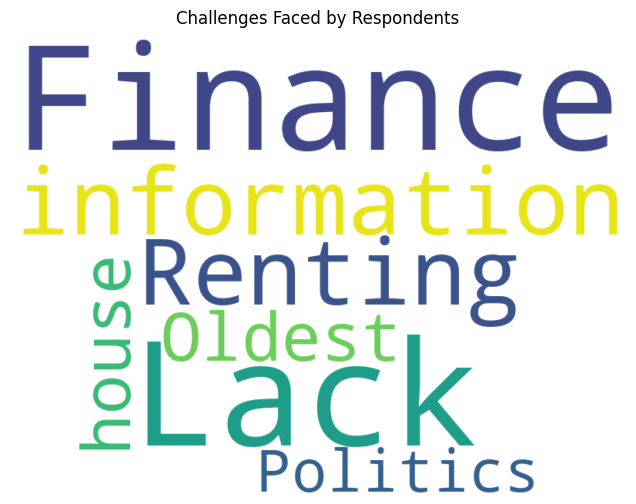

In [46]:
# Create the wordcloud object
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)

# Create a figure and display the wordcloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Challenges Faced by Respondents")
plt.show()

**LOGISTIC REGRESSION**

Training a Logistic Regression model to predict the likelihood of a household adopting weather-based energy management strategies based on the challenges they face. This is just one approach, and other models like Random Forests or Support Vector Machines could also be explored depending on your data and preferences.

Data Preparation:

- Feature Engineering: Convert the challenges faced by respondents into numerical features. You can do this in a few ways:
Presence/Absence: Create a binary feature for each challenge (e.g., 1 if "Financial opportunities" is mentioned, 0 otherwise).
Frequency: Count the number of times each challenge is mentioned for a household.
- Target Variable: Define a binary target variable indicating whether a household is likely to adopt (1) or not (0) based on their survey responses (assuming you have this information).
Here's an example using Python libraries like Pandas and scikit-learn:

Part 1: Importing Libraries

In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Part 2: Loading and Preparing Data 

In [48]:
# Assuming your data is in a CSV file named 'survey_data.csv'
data = pd.read_csv('survey_data.csv')

# Feature engineering - Method 1: Using boolean indexing directly (recommended)
challenge_features = {}
for challenge in data.columns[data.columns.str.contains('challenge')]:
  challenge_features[challenge] = data[challenge].apply(lambda x: 1 if x else 0)

# Feature engineering - Method 2: Using list comprehension (optional)
# challenge_features = {challenge: data[challenge].apply(lambda x: 1 if x else 0) for challenge in data.columns if 'challenge' in challenge}  # Uncomment if preferred

# Combine features and target variable
features = pd.DataFrame(challenge_features)
target = data['weather-based_energy_management_strategies_adoption']

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model (replace with desired metric)
predictions = model.predict(X_test)
accuracy = (predictions == y_test).mean()
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.425


Model Selection and Tuning:
Logistic Regression might not be the best model for these data. Other classification algorithms like Random Forest, Support Vector Machines (SVM), or Gradient Boosting Machines may be suitable. These models might be better suited to capture non-linear relationships in the data.
Experiment with hyperparameter tuning for the chosen model. Hyperparameters are settings that control the model's behavior, and tuning them can significantly improve performance. Tools like GridSearchCV can be used for this purpose.